<a href="https://colab.research.google.com/github/YUEWU1233/MGT-502-Data-Science-and-Machine-Learning/blob/main/ML_Assignment_3__YueWu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DSML investigation:

You are part of the Suisse Impossible Mission Force, or SIMF for short. You need to uncover a rogue agent that is trying to steal sensitive information.

Your mission, should you choose to accept it, is to find that agent before stealing any classified information. Good luck!

# Assignment part three
### Due 26.03.2024

We received new intelligence informing us that the rogue agent has a position with great responsibility.
Use the table "HR_Analytics.csv" to create a classifier model that predicts the job role of a person. Use this model to predict the roles of the table of suspects "suspect_HR_data.csv".

Retain only the list of suspects whose role indicates high responsibility.


## Getting to know our data

- BusinessTravel: The frequency of business travel for the employee. (Categorical)
- DailyRate: The daily rate of pay for the employee. (Numerical)
- DistanceFromHome: The distance from home in miles for the employee. (Numerical)
- Education: The level of education achieved by the employee. (Categorical)
- EmployeeCount: The total number of employees in the organization. (Numerical)
- EmployeeNumber: A unique identifier for each employee profile. (Numerical)
- EnvironmentSatisfaction: The employee's satisfaction with their work environment. (Categorical)
- Gender: The gender of the employee. (Categorical)
- HourlyRate: The hourly rate of pay for the employee. (Numerical)
- JobInvolvement: The level of involvement required for the employee's job. (Categorical)
- JobLevel: The job level of the employee. (Categorical)
- JobSatisfaction: The employee's satisfaction with their job. (Categorical)
- MonthlyIncome: The monthly income of the employee. (Numerical)
- MonthlyRate: The monthly rate of pay for the employee. (Numerical)
- NumCompaniesWorked: The number of companies the employee has worked for. (Numerical)
- Over18: Whether or not the employee is over 18. (Categorical)
- OverTime: Whether or not the employee works overtime. (Categorical)
- PercentSalaryHike: The percentage of salary hike for the employee. (Numerical)
- PerformanceRating: The performance rating of the employee. (Categorical)
- RelationshipSatisfaction: The employee's satisfaction with their relationships. (Categorical)
- StandardHours: The standard hours of work for the employee. (Numerical)
- StockOptionLevel: The stock option level of the employee. (Numerical)
- TotalWorkingYears: The total number of years the employee has worked. (Numerical)
- TrainingTimesLastYear: The number of times the employee was taken for training in the last year. (Numerical)
- WorkLifeBalance: The employee's perception of their work-life balance. (Categorical)
- YearsAtCompany: The number of years the employee has been with the company. (Numerical)
- YearsInCurrentRole: The number of years the employee has been in their current role. (Numerical)
- YearsSinceLastPromotion: The number of years since the employee's last promotion. (Numerical)
- YearsWithCurrManager: The number of years the employee has been with their current manager. (Numerical)

In [1]:
# Import required packages
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/Assignements/Part%203/data/HR_Analytics.csv", index_col='Unnamed: 0')
suspects = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/Assignements/Part%203/data/suspects.csv", index_col='Unnamed: 0')


## 1. Check the data

Display the first rows of the datasets at hand. Display the list of columns they have.

In [2]:
# Your code here
print("First few rows of HR Analytics dataset:")
print(df.head())

# Display the list of columns for each dataset
print("Columns in HR Analytics dataset:")
print(df.columns.tolist())

First few rows of HR Analytics dataset:
      BusinessTravel  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      Travel_Rarely       1102                 1          2              1   
1  Travel_Frequently        279                 8          1              1   
2      Travel_Rarely       1373                 2          2              1   
3  Travel_Frequently       1392                 3          4              1   
4      Travel_Rarely        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0               1                        2  Female          94   
1               2                        3    Male          61   
2               4                        4    Male          92   
3               5                        4  Female          56   
4               7                        1    Male          40   

   JobInvolvement  ...  RelationshipSatisfaction  StandardHours  \
0               3  ..

In [23]:
df['JobLevel'].unique()

array([2, 1, 3, 4, 5])

In [3]:
#Same steps for the suspects dataset
print("First few rows of Suspects dataset:")
print(suspects.head())

print("Columns in Suspects dataset:")
print(suspects.columns.tolist())

First few rows of Suspects dataset:
   userID     BusinessTravel  DailyRate  DistanceFromHome  Education  \
0  317991      Travel_Rarely       1102                 1          2   
1  241892  Travel_Frequently        279                 8          1   
2  303376      Travel_Rarely       1373                 2          2   
3  761992  Travel_Frequently       1392                 3          4   
4  373318      Travel_Rarely        591                 2          1   

   EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0              1               1                        2  Female          94   
1              1               2                        3    Male          61   
2              1               4                        4    Male          92   
3              1               5                        4  Female          56   
4              1               7                        1    Male          40   

   ...  RelationshipSatisfaction  StandardHo

## 2. Encode

Consider the first dataset (df). We will train our models on this data.

Encode categorical varibles:

* Label Encoding: BusinessTravel.
* One-Hot Encoding: Gender, Overtime.

In [4]:
#Apply one-hot encoding to nominal variables
# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to 'BusinessTravel'
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])

df


,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1102,1,2,1,1,2,Female,94,3,...,1,80,0,8,0,1,6,4,0,5
1,1,279,8,1,1,2,3,Male,61,2,...,4,80,1,10,3,3,10,7,1,7
2,2,1373,2,2,1,4,4,Male,92,2,...,2,80,0,7,3,3,0,0,0,0
3,1,1392,3,4,1,5,4,Female,56,3,...,3,80,0,8,3,3,8,7,3,0
4,2,591,2,1,1,7,1,Male,40,3,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,884,23,2,1,2061,3,Male,41,4,...,3,80,1,17,3,3,5,2,0,3
1466,2,613,6,1,1,2062,4,Male,42,2,...,1,80,1,9,5,3,7,7,1,7
1467,2,155,4,3,1,2064,2,Male,87,4,...,2,80,1,6,0,3,6,2,0,3
1468,1,1023,2,3,1,2065,4,Male,63,2,...,4,80,0,17,3,2,9,6,0,8


In [5]:
# Apply label encoding to ordinal variables
df = pd.concat([df, pd.get_dummies(df['Gender'], prefix='Gender')], axis=1)
df = pd.concat([df, pd.get_dummies(df['OverTime'], prefix='OverTime')], axis=1)

# Drop the original 'Gender' and 'OverTime' columns as they are now encoded
df.drop(['Gender', 'OverTime'], axis=1, inplace=True)


In [6]:
df

,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male,OverTime_No,OverTime_Yes
0,2,1102,1,2,1,1,2,94,3,2,...,0,1,6,4,0,5,1,0,0,1
1,1,279,8,1,1,2,3,61,2,2,...,3,3,10,7,1,7,0,1,1,0
2,2,1373,2,2,1,4,4,92,2,1,...,3,3,0,0,0,0,0,1,0,1
3,1,1392,3,4,1,5,4,56,3,1,...,3,3,8,7,3,0,1,0,0,1
4,2,591,2,1,1,7,1,40,3,1,...,3,3,2,2,2,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,884,23,2,1,2061,3,41,4,2,...,3,3,5,2,0,3,0,1,1,0
1466,2,613,6,1,1,2062,4,42,2,3,...,5,3,7,7,1,7,0,1,1,0
1467,2,155,4,3,1,2064,2,87,4,2,...,0,3,6,2,0,3,0,1,0,1
1468,1,1023,2,3,1,2065,4,63,2,2,...,3,2,9,6,0,8,0,1,1,0


## 3. Split and rescale

For df:

* Define your dependent variable y ("JobLevel") and your independent features X;
* Set random seed to 123;
* Set test size to 20% and train size to 80%;
* Split you dataset into test and train set;
* Rescale it using MinMaxScaler

In [7]:
# Split your data into features (X) and target variable (y)
y = df['JobLevel']
X = df.drop(['JobLevel'], axis=1)  # Drop the target variable from the features set

# Set random seed to 123
random_seed = 123
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= random_seed)

# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

### Suspects dataset

Now encode and rescale the second dataset 'suspects'. We will use this dataset to make predictions.

*Hint:* When you checked both datasets, you might have noticed that they have two columns that differ: 'userID' for suspects and 'JobLevel' for df. To avoid an error due to this discrepancy, you can extract the features used in training from the 'suspects' dataset and apply preprocessing steps to the extracted features.

In [8]:
# Extract the features used in training from the 'suspects' dataset
suspects_features = suspects.drop(['userID'], axis=1)

# Apply preprocessing steps to the extracted features
suspects_features['BusinessTravel'] = le.transform(suspects_features['BusinessTravel'])
gender_dummies = pd.get_dummies(suspects_features['Gender'], prefix='Gender')
overtime_dummies = pd.get_dummies(suspects_features['OverTime'], prefix='OverTime')
# Drop original columns to avoid duplication
suspects_features.drop(['Gender', 'OverTime'], axis=1, inplace=True)

# Concatenate the new one-hot encoded columns
suspects_features = pd.concat([suspects_features, gender_dummies, overtime_dummies], axis=1)

# Transform the preprocessed 'suspects' features using the scaler fitted on the training data
suspects_scaled = scaler.transform(suspects_features)

In [9]:
suspects_features

,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male,OverTime_No,OverTime_Yes
0,2,1102,1,2,1,1,2,94,3,4,...,0,1,6,4,0,5,1,0,0,1
1,1,279,8,1,1,2,3,61,2,2,...,3,3,10,7,1,7,0,1,1,0
2,2,1373,2,2,1,4,4,92,2,3,...,3,3,0,0,0,0,0,1,0,1
3,1,1392,3,4,1,5,4,56,3,3,...,3,3,8,7,3,0,1,0,0,1
4,2,591,2,1,1,7,1,40,3,2,...,3,3,2,2,2,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,2,1206,17,1,1,1009,4,41,2,3,...,6,3,4,2,3,2,1,0,1,0
725,2,622,14,4,1,1010,3,39,2,2,...,2,1,4,2,0,2,0,1,0,1
726,1,853,1,1,1,1011,3,96,3,1,...,1,3,4,3,0,3,1,0,1,0
727,0,287,5,2,1,1012,2,73,3,4,...,2,3,0,0,0,0,0,1,1,0


## 4. Logistic regresstion

Train a logistic regression. Set the parameter 'max_iter' to 1000. Display the model's test accuracy.

In [10]:
# Initialize logistic regression model
model = LogisticRegression(max_iter=1000, random_state=random_seed)

# Train the logistic regression model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict using the trained model on the scaled test data
y_pred = model.predict(X_test_scaled)
# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7448979591836735


## 5. Evaluate your model

Print classification report.

In [11]:
# Calculate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.95      0.85        93
           2       0.75      0.77      0.76       112
           3       0.68      0.49      0.57        47
           4       0.67      0.44      0.53        27
           5       0.67      0.67      0.67        15

    accuracy                           0.74       294
   macro avg       0.71      0.66      0.68       294
weighted avg       0.74      0.74      0.73       294



Print a heatmap of a confusion matrix.

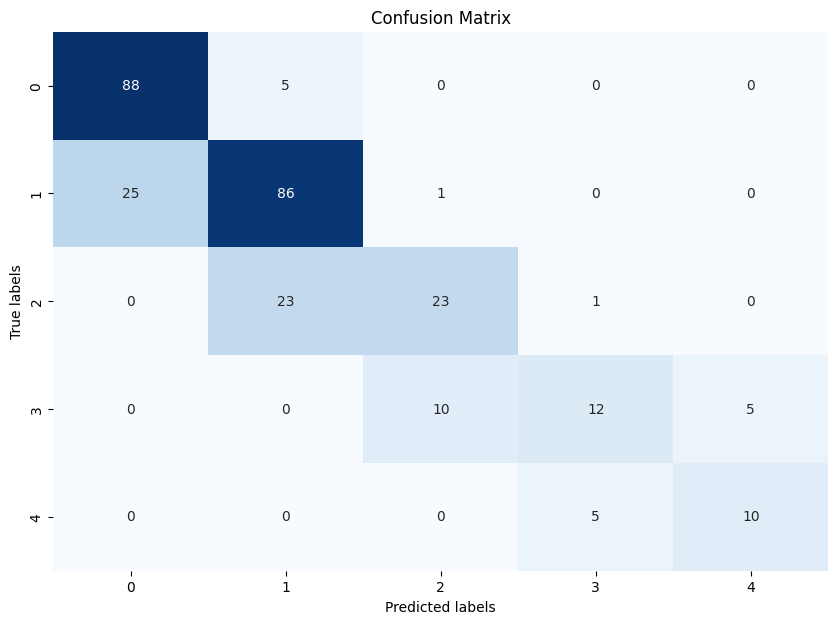

In [12]:
# Plot confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**With which category you classifier struggles the most?**
Answer: 2

Calculate the default rate.

In [25]:
most_common_class_size = cm.diagonal().max()
total_size = cm.sum()
default_rate = most_common_class_size / total_size

print(f"Default Rate: {default_rate:.2f}")

Default Rate: 0.33


## 6. Trying a different type of classification algorithm

* Train your classification algorithm using RandomForestClassifier;
* Set random state to random seed;
* Do not specify any other parameters;
* Evaluate your model by displaying its accuracy.

In [29]:
# Train your classification algorithm
classifier = RandomForestClassifier(random_state=random_seed)

# Evaluate your model
# Train the classifier on the training data
classifier.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_rfc = classifier.predict(X_test_scaled)

# Calculate the accuracy
accuracy_rfc = accuracy_score(y_test, y_pred_rfc) *100
print(f"Model Accuracy: {accuracy_rfc:.2f}%")

Model Accuracy: 90.82%


Dispay classification matrix and confusion matrix.

              precision    recall  f1-score   support

           1       0.90      0.94      0.92        93
           2       0.92      0.87      0.89       112
           3       0.88      0.91      0.90        47
           4       0.93      0.96      0.95        27
           5       1.00      0.93      0.97        15

    accuracy                           0.91       294
   macro avg       0.92      0.92      0.92       294
weighted avg       0.91      0.91      0.91       294



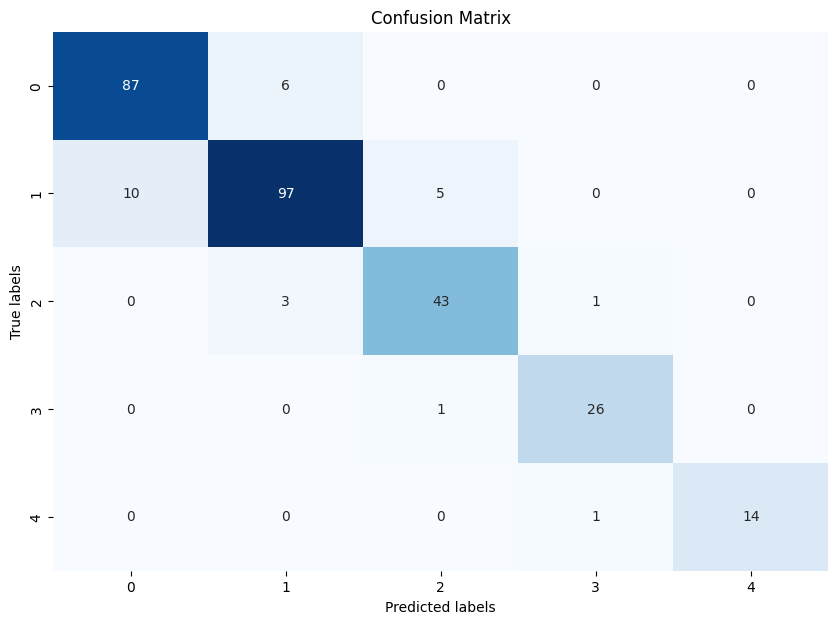

In [27]:
# Your code here
# Generate classification report
print(classification_report(y_test, y_pred_rfc))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rfc)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## 7. Decision tree

Use the decision tree model to predict the JobLevel of the potential suspects. Set max_depth to 5 and random state to random seed.

In [30]:
# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=random_seed)

# Train the Decision Tree classifier on the training data
decision_tree_classifier.fit(X_train_scaled, y_train)
# Make predictions on the test data
y_pred_dt = decision_tree_classifier.predict(X_test_scaled)
# Calculate accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt) *100

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}%")

Decision Tree Accuracy: 91.16%


Dispay classification matrix and confusion matrix.

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           1       0.89      0.92      0.91        93
           2       0.92      0.86      0.89       112
           3       0.87      0.98      0.92        47
           4       1.00      0.93      0.96        27
           5       1.00      1.00      1.00        15

    accuracy                           0.91       294
   macro avg       0.94      0.94      0.94       294
weighted avg       0.91      0.91      0.91       294



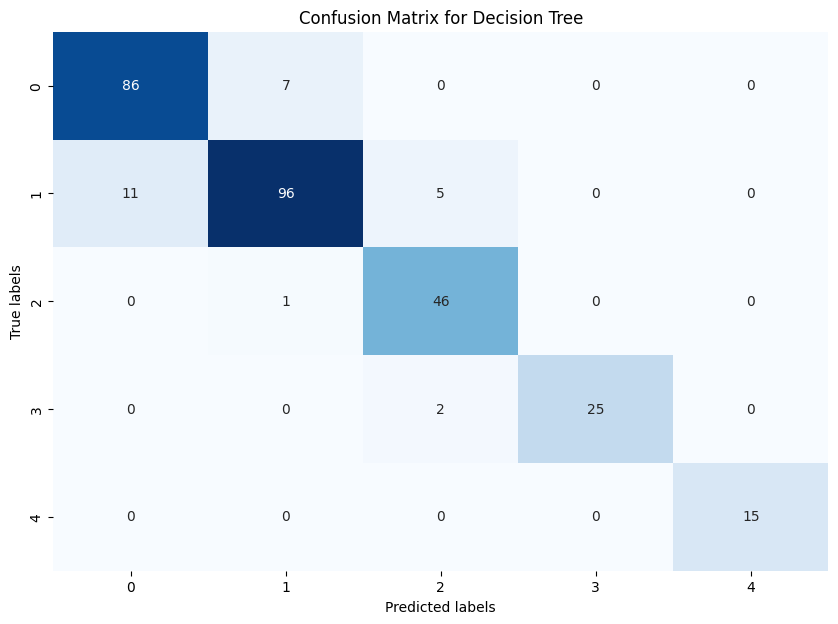

In [17]:
#Your code here
classification_report_dt = classification_report(y_test, y_pred)
print("Classification Report for Decision Tree:")
print(classification_report_dt)

# Calculate the confusion matrix
confusion_matrix_dt = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

## 8. kNN

Use the kNN model to predict the JobLevel of the potential suspects. Do not specify any parameters (the model will use the default parameters).

In [18]:

# Initialize the kNN classifier
knn_classifier = KNeighborsClassifier()

# Train the kNN classifier on the training data
knn_classifier.fit(X_train_scaled, y_train)
# Make predictions on the test data
y_pred_knn = knn_classifier.predict(X_test_scaled)
# Calculate accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)*100
print(f"k-NN Model Accuracy: {accuracy_knn:.2f}%")

k-NN Model Accuracy: 39.46%


The accuracy is not great, is it? Let's try to fine tune the value of the hyperparameter 'n_neighbors' for the k-Nearest Neighbors (kNN) classifier. The best way to do so is to use a technique called hyperparameter tuning. One common approach is to perform a grid search over a range of possible values for 'n_neighbors' and evaluate the performance of the model using cross-validation.

* Use a range value of hyperparmeter k from 1 to 15. This range is a parameter used by the GridSearchCV to define the best value of k.
* Set the cross-validation to 5 folds.
* Set `scoring='accuracy', 'return_train_score=False', verbose=1

In [19]:
# Define the parameter grid
param_grid = {'n_neighbors': list(range(1, 16))}

# Initialize the kNN classifier
knn_classifier = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=1)

# Perform grid search to find the best value of n_neighbors
grid_search.fit(X_train_scaled, y_train)
# Get the best value of n_neighbors
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value of n_neighbors: {best_k}")

# Train the kNN classifier with the best value of n_neighbors
best_knn_classifier = grid_search.best_estimator_
# Evaluate the performance of the best kNN classifier
y_pred_best_knn = best_knn_classifier.predict(X_test_scaled)
best_knn_accuracy = accuracy_score(y_test, y_pred_best_knn)*100
print(f"Best k-NN Model Accuracy: {best_knn_accuracy:.2f}%")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best value of n_neighbors: 10
Best k-NN Model Accuracy: 43.20%


## 9. Remaining suspects

In this section we will identify the potential suspects  according to our new intelligence. Let's use the logistic regression trained on 'df' and make predictions on 'suspects'.

Display a table with UserID and a corresponding predicted job level.

In [20]:
suspects

,userID,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,317991,Travel_Rarely,1102,1,2,1,1,2,Female,94,...,1,80,0,8,0,1,6,4,0,5
1,241892,Travel_Frequently,279,8,1,1,2,3,Male,61,...,4,80,1,10,3,3,10,7,1,7
2,303376,Travel_Rarely,1373,2,2,1,4,4,Male,92,...,2,80,0,7,3,3,0,0,0,0
3,761992,Travel_Frequently,1392,3,4,1,5,4,Female,56,...,3,80,0,8,3,3,8,7,3,0
4,373318,Travel_Rarely,591,2,1,1,7,1,Male,40,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,458293,Travel_Rarely,1206,17,1,1,1009,4,Female,41,...,2,80,2,5,6,3,4,2,3,2
725,218415,Travel_Rarely,622,14,4,1,1010,3,Male,39,...,4,80,1,5,2,1,4,2,0,2
726,173906,Travel_Frequently,853,1,1,1,1011,3,Female,96,...,3,80,1,4,1,3,4,3,0,3
727,178685,Non-Travel,287,5,2,1,1012,2,Male,73,...,4,80,0,0,2,3,0,0,0,0


In [21]:
# Make predictions using the trained logistic regression model on the preprocessed 'suspects' dataset
suspects_job_level_predictions = model.predict(suspects_scaled)
# Concatenate UserIDs with predictions
predictions_table = pd.DataFrame({
    'userID': suspects['userID'],
    'PredictedJobLevel': suspects_job_level_predictions
})

# Print the predictions along with UserIDs
print(predictions_table)

     userID  PredictedJobLevel
0    317991                  2
1    241892                  2
2    303376                  1
3    761992                  1
4    373318                  1
..      ...                ...
724  458293                  1
725  218415                  1
726  173906                  1
727  178685                  1
728    2008                  3

[729 rows x 2 columns]


As you remember, the culprit is believed to hold a high position. Therefore, we should filter our potential suspects leaving only those, whose job level is 4 and above.

Display the list of suspects, whose predicted job level is >=4.

In [22]:
# Filter the 'suspects_results' DataFrame for predicted job levels 4 and above
high_risk_suspects = predictions_table[predictions_table['PredictedJobLevel'] >= 4]
# Display the list of UserIDs
print(high_risk_suspects['userID'])

18     531937
25     512604
29     306495
45     344946
62     939524
        ...  
653    487236
699    934535
706    832011
714    620807
716    866017
Name: userID, Length: 75, dtype: int64


In [36]:
suspect_ids_to_check = ['365406', '793674', '487236', '745902', '173906']

# Print UserIDs that are in the list
for i in high_risk_suspects['userID']:
    if str(i) in suspect_ids_to_check:
        print(i)

365406
793674
487236
